CNN Model to detect different Emotions of Humans using Transfer Learning

Different Emotions detected in this Model: 'angry','fear','happy','neutral','sad','surprised'

Importing Necessary Libraries

In [1]:
import os
from keras.applications.vgg16 import VGG16   # input shape-224,224,3
from keras.preprocessing.image import ImageDataGenerator     # image augmentation
from keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

Defining train and test path

In [2]:
train_path=r'D:\DL Projects\Projects\Emotion_Detection_2\train'
test_path=r'D:\DL Projects\Projects\Emotion_Detection_2\test'

**Transfer Learning**

Transfer learning in a CNN refers to using a pre-trained model on a similar task as a starting point for training a new model on a different task.

In [3]:
vgg=VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False) 

In [4]:
# Not to train vgg16 again
for layer in vgg.layers:
  layer.trainable=False

In [5]:
x=Flatten()(vgg.output)  
prediction=Dense(6,activation='softmax')(x)

In [6]:
from keras.models import Model 
model=Model(inputs=vgg.input,outputs=prediction)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from numpy.random import test
train_datagen=ImageDataGenerator(rescale=1/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1/255)
training_set=train_datagen.flow_from_directory(train_path,
                                               target_size=(224,224),
                                               batch_size=64,
                                               class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_path,
                                          target_size=(224,224),
                                          batch_size=64,
                                          class_mode='categorical')

Found 6440 images belonging to 6 classes.
Found 860 images belonging to 6 classes.


In [10]:
r=model.fit_generator(training_set,validation_data=test_set,epochs=10)

C:\Users\user\AppData\Local\Temp\ipykernel_1420\347333967.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=10)


Epoch 1/10
101/101 [==============================] - 1835s 18s/step - loss: 1.7350 - accuracy: 0.3171 - val_loss: 1.6622 - val_accuracy: 0.3500
Epoch 2/10
101/101 [==============================] - 1773s 18s/step - loss: 1.4775 - accuracy: 0.4234 - val_loss: 1.5583 - val_accuracy: 0.4093
Epoch 3/10
101/101 [==============================] - 1766s 17s/step - loss: 1.3719 - accuracy: 0.4632 - val_loss: 1.3936 - val_accuracy: 0.4593
Epoch 4/10
101/101 [==============================] - 1758s 17s/step - loss: 1.3046 - accuracy: 0.4866 - val_loss: 1.5317 - val_accuracy: 0.4186
Epoch 5/10
101/101 [==============================] - 1759s 17s/step - loss: 1.2956 - accuracy: 0.5000 - val_loss: 1.3876 - val_accuracy: 0.4488
Epoch 6/10
101/101 [==============================] - 1769s 18s/step - loss: 1.2323 - accuracy: 0.5334 - val_loss: 1.4154 - val_accuracy: 0.4872
Epoch 7/10
101/101 [==============================] - 1721s 17s/step - loss: 1.1919 - accuracy: 0.5469 - val_loss: 1.3967 - val_ac

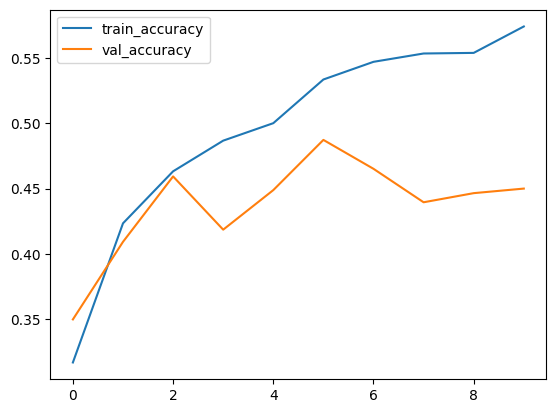

In [11]:
plt.plot(r.history['accuracy'],label='train_accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()


In [17]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np

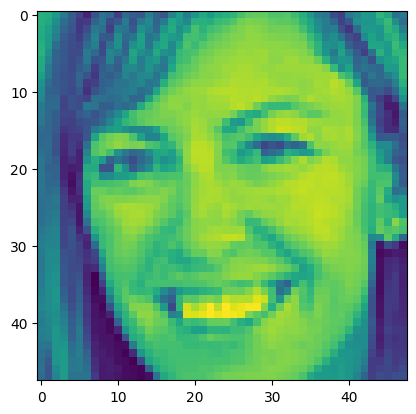

In [14]:
img=imread(r'D:\DL Projects\Projects\Emotion_Detection_2\train\happy\im11.png')
plt.imshow(img)

In [18]:
img=resize(img,(224,224,3))
img_array=np.array(img)
img_array=img_array.reshape(1,224,224,3)

In [21]:
categories=['angry','fearful','happy','neutral','sad','surprised']

In [19]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 1s 588ms/step
[[0.03657832 0.05624265 0.47935417 0.0774458  0.3350162  0.01536288]]


In [22]:
ind=pred.argmax()  # max percentage in class labels
print(ind)
print(categories[ind])

2
happy


In [12]:
model.save('emotion_model_2.h5')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
